In [6]:
import pandas as pd

import sys
sys.path.append("../")

import warnings  
warnings.filterwarnings("ignore") 

from src.support_ensemble import AnalisisModelosClasificacion

In [3]:
df = pd.read_csv('../data/output/financial_data_preprocessed.csv', index_col=0)

In [4]:
df.head()

,is_fraudulent,customer_id,merchant_id,amount,location,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa
0,0,0.779808,0.510079,0.575423,0.389453,0.900628,0.480769,0.0,0.0,1.0,0.0
1,1,0.791454,0.584829,0.189301,0.578321,0.143774,0.826923,0.0,0.0,0.0,1.0
2,1,0.948651,0.463460,0.123960,1.000000,0.900628,0.750000,0.0,0.0,1.0,0.0
3,1,0.791454,0.541243,0.761671,1.000000,0.512530,0.788462,0.0,1.0,0.0,0.0
4,1,0.518519,0.533525,0.188153,0.389453,0.678115,0.346154,0.0,0.0,1.0,0.0


## Regresión logística

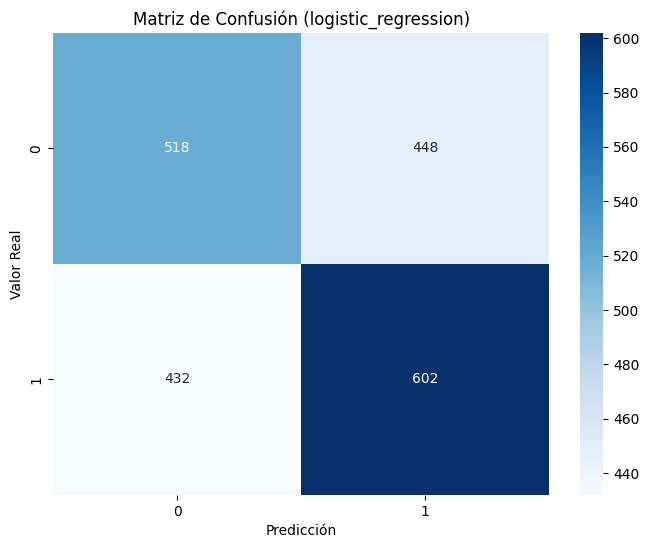

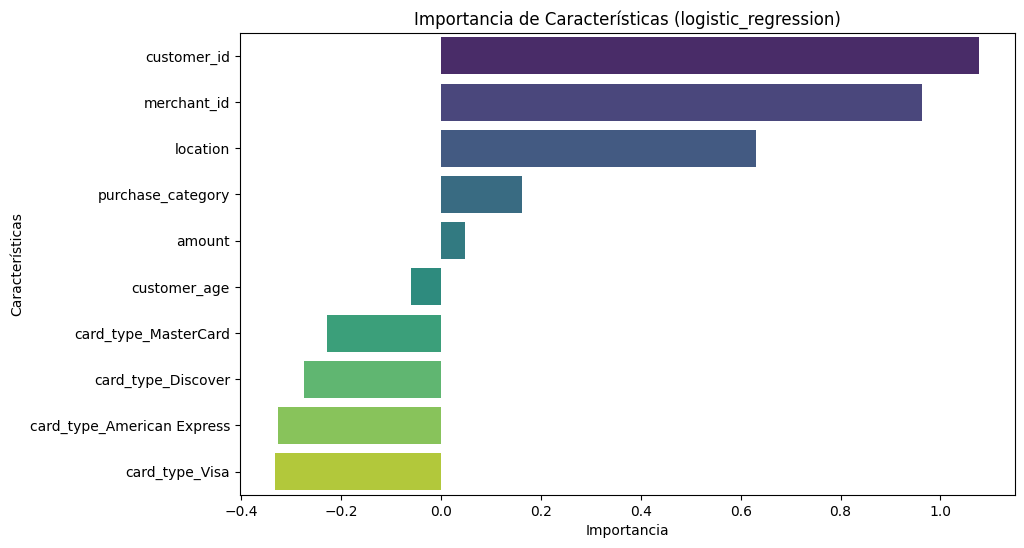

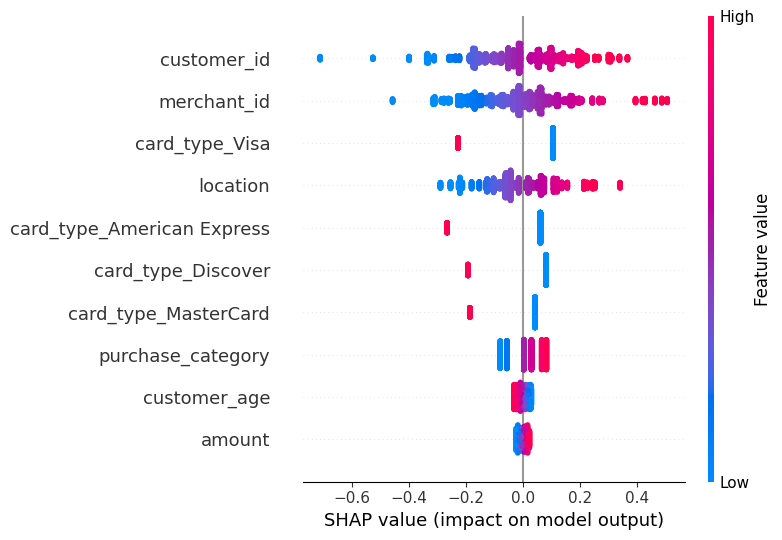

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.558375,0.558315,0.558375,0.558181,0.116429,0.585934,0.001982,NaN,NaN,NaN,regresion logistica
test,0.560000,0.559775,0.560000,0.559852,0.118501,0.596518,NaN,NaN,0.001982,NaN,regresion logistica


In [7]:
# instanciamos la clase de regresión logistica
logistica = AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression')
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### Matriz de confusión

- **Verdaderos negativos (TN)**:  **518** casos donde el modelo predijo correctamente la clase "0" (negativa).

- **Falsos positivos (FP)**: **448** casos donde el modelo predijo "1" (positiva), pero en realidad eran "0" (negativa).

- **Falsos negativos (FN)**: **432** casos donde el modelo predijo "0" (negativa), pero en realidad eran "1" (positiva).

- **Verdaderos positivos (TP)**: **602** casos donde el modelo predijo correctamente la clase "1" (positiva).

### Métricas

En general, los resultados de las métricas de evaluación de nuestro modelo indican que el modelo tiene un rendimiento no demasiado bueno tanto en el conjunto de entrenamiento como en el de prueba.

Los resultados entre train y test son bastante parecidos entre sí, por lo que no tenemos problemas de overfitting.

### Importancia de características

### Shap

---

## Árbol de decisión

El mejor modelo es DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)


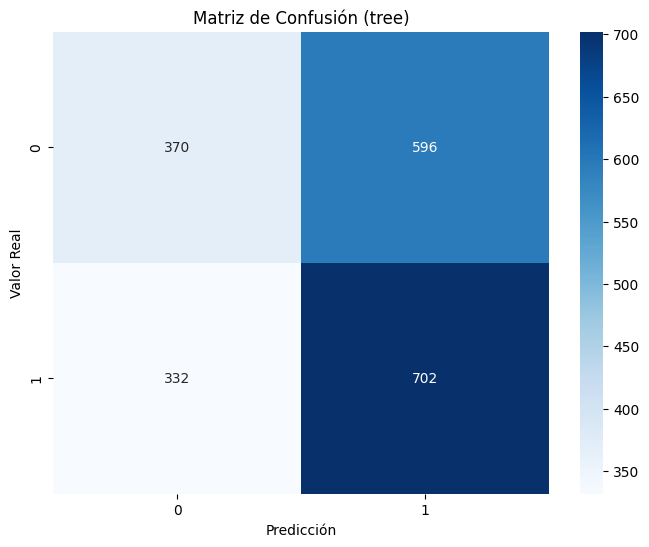

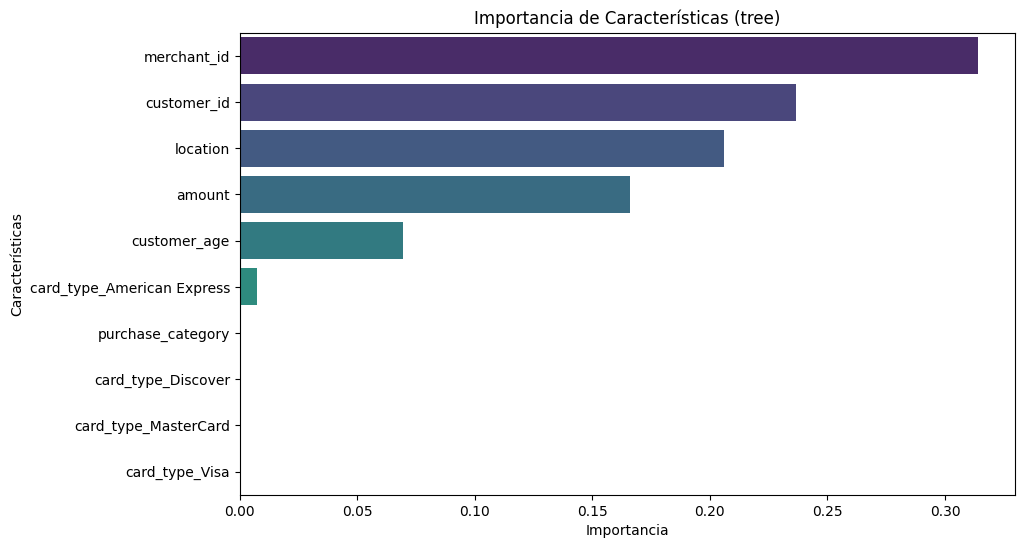

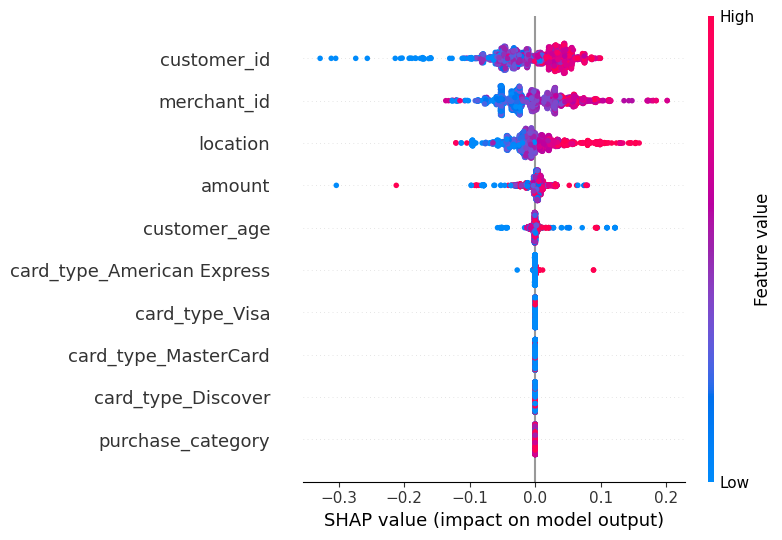

In [9]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree')
logistica.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre =  "tree" )
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)

In [10]:
df_resultados_final

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.566125,0.571025,0.566125,0.556286,0.130048,0.595963,0.001034,11.0,NaN,NaN,decision tree
test,0.536000,0.534183,0.536000,0.525545,0.062501,0.556378,NaN,NaN,0.001034,11.0,decision tree
train,0.558375,0.558315,0.558375,0.558181,0.116429,0.585934,0.001982,NaN,NaN,NaN,regresion logistica
test,0.560000,0.559775,0.560000,0.559852,0.118501,0.596518,NaN,NaN,0.001982,NaN,regresion logistica


## Random forest

El mejor modelo es RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=200)


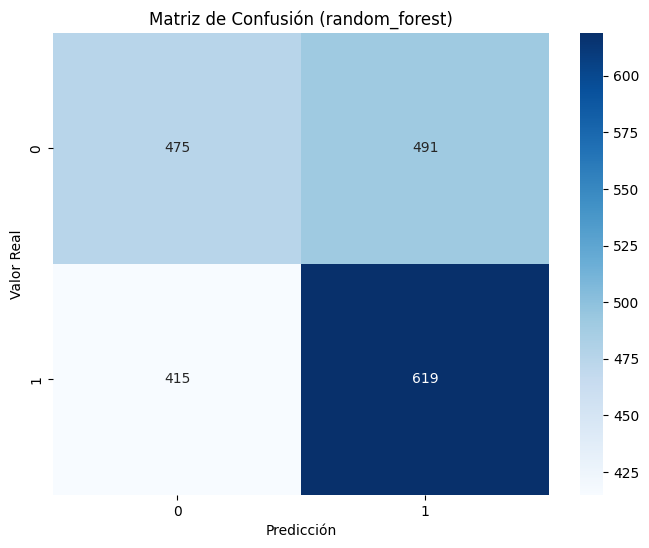

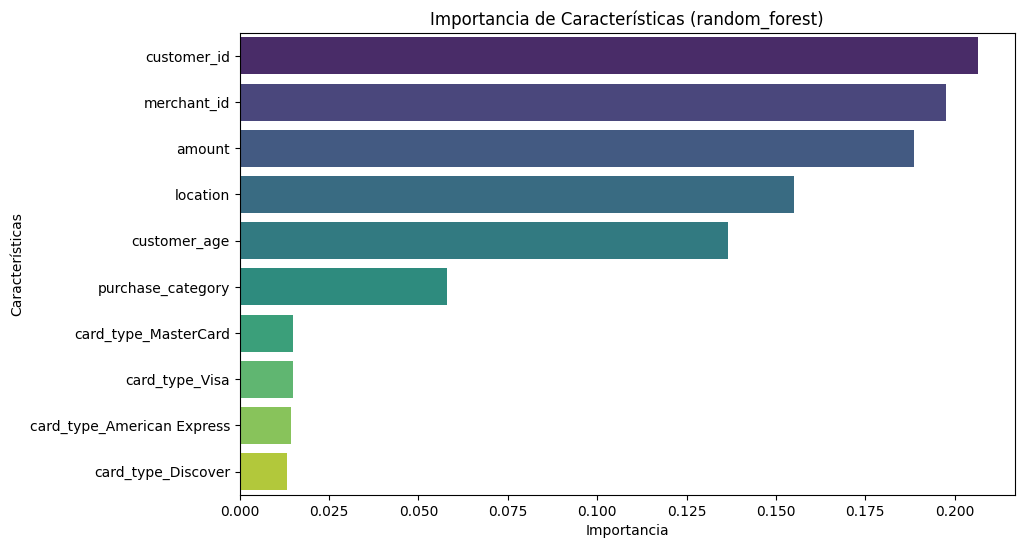

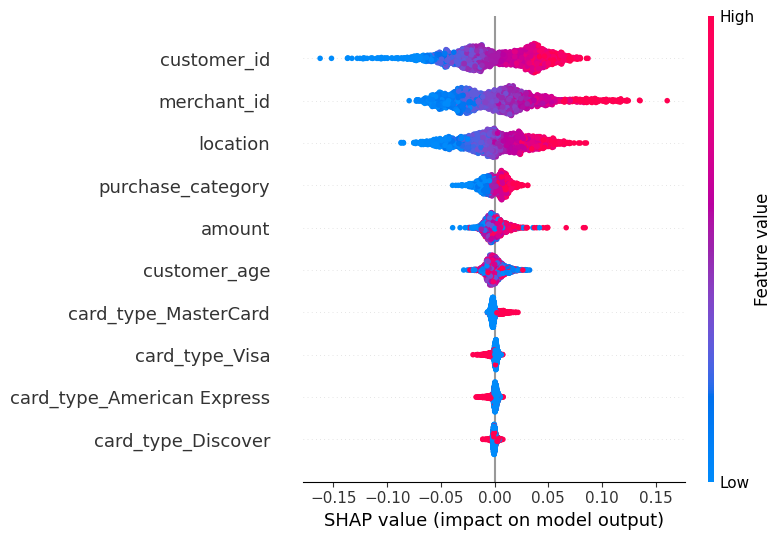

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.566125,0.571025,0.566125,0.556286,0.130048,0.595963,0.001034,11.0,NaN,NaN,decision tree
test,0.536000,0.534183,0.536000,0.525545,0.062501,0.556378,NaN,NaN,0.001034,11.0,decision tree
train,0.558375,0.558315,0.558375,0.558181,0.116429,0.585934,0.001982,NaN,NaN,NaN,regresion logistica
test,0.560000,0.559775,0.560000,0.559852,0.118501,0.596518,NaN,NaN,0.001982,NaN,regresion logistica
train,0.706125,0.706714,0.706125,0.705788,0.411909,0.795255,0.081281,NaN,NaN,NaN,random_forest
test,0.547000,0.546090,0.547000,0.545754,0.090599,0.574826,NaN,NaN,0.081281,NaN,random_forest


In [11]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest')
logistica.plot_shap_summary(modelo_nombre ='random_forest')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_forest = logistica.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_forest["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=2,
                           min_samples_split=5, subsample=0.8)


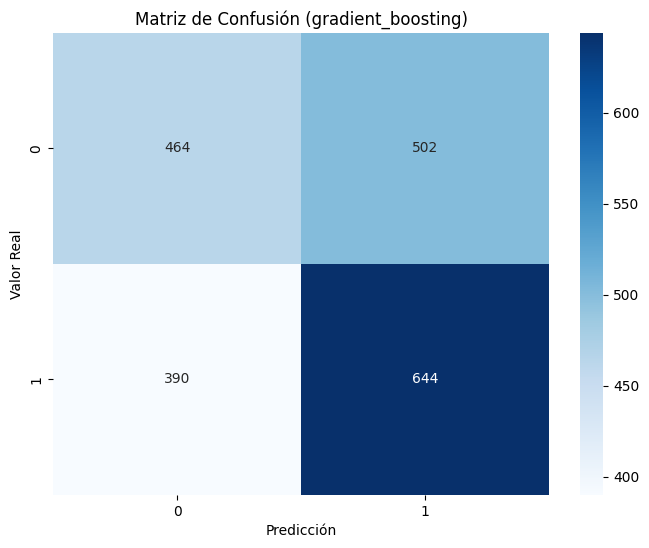

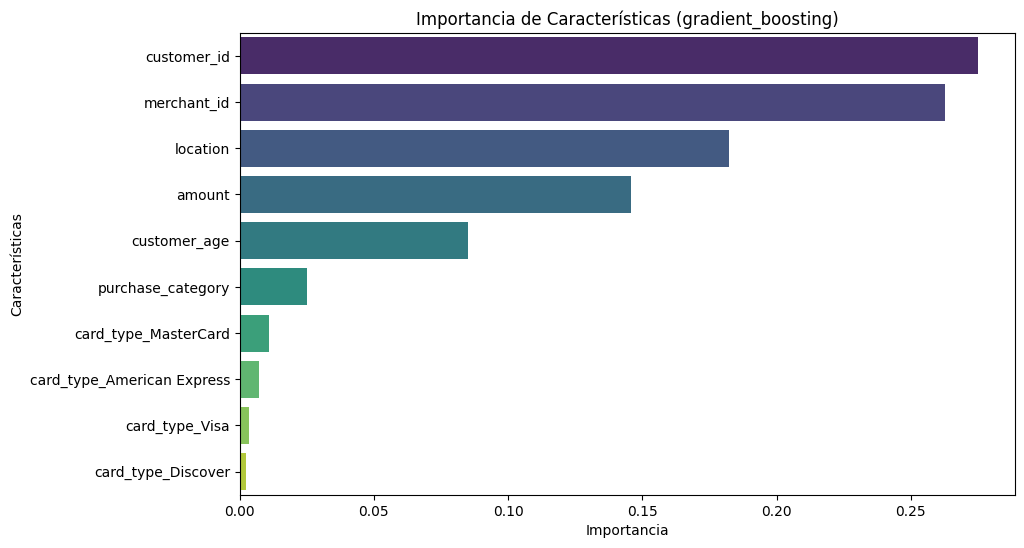

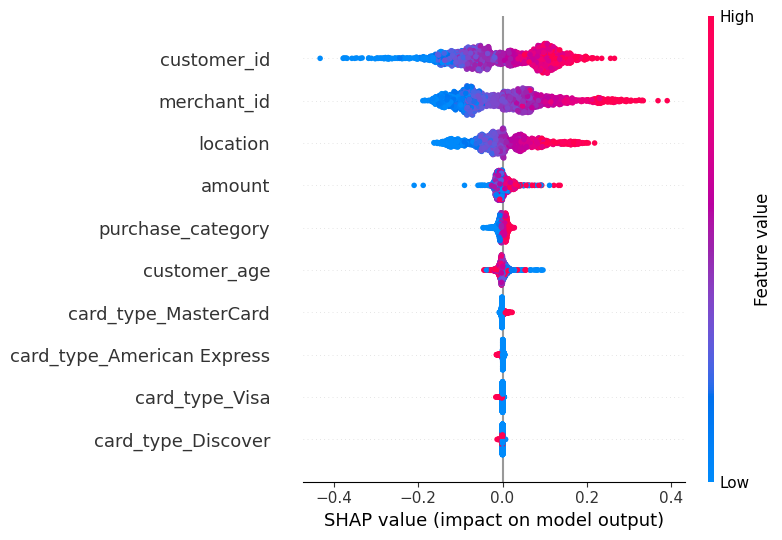

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.566125,0.571025,0.566125,0.556286,0.130048,0.595963,0.001034,11.0,NaN,NaN,decision tree
test,0.536000,0.534183,0.536000,0.525545,0.062501,0.556378,NaN,NaN,0.001034,11.0,decision tree
train,0.558375,0.558315,0.558375,0.558181,0.116429,0.585934,0.001982,NaN,NaN,NaN,regresion logistica
test,0.560000,0.559775,0.560000,0.559852,0.118501,0.596518,NaN,NaN,0.001982,NaN,regresion logistica
train,0.706125,0.706714,0.706125,0.705788,0.411909,0.795255,0.081281,NaN,NaN,NaN,random_forest
test,0.547000,0.546090,0.547000,0.545754,0.090599,0.574826,NaN,NaN,0.081281,NaN,random_forest
train,0.589875,0.590967,0.589875,0.587898,0.178781,0.631902,0.016545,11.0,NaN,NaN,gradient_boosting
test,0.554000,0.552957,0.554000,0.551734,0.103550,0.576997,NaN,NaN,0.016545,11.0,gradient_boosting


In [12]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting')
logistica.plot_shap_summary(modelo_nombre="gradient_boosting")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_resultados_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


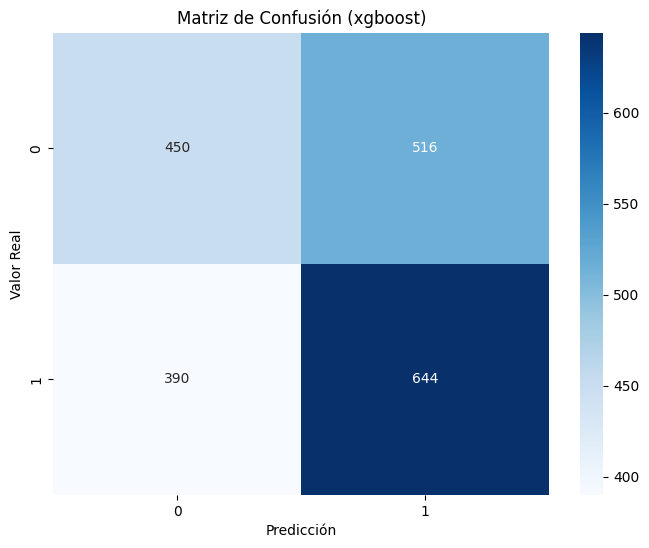

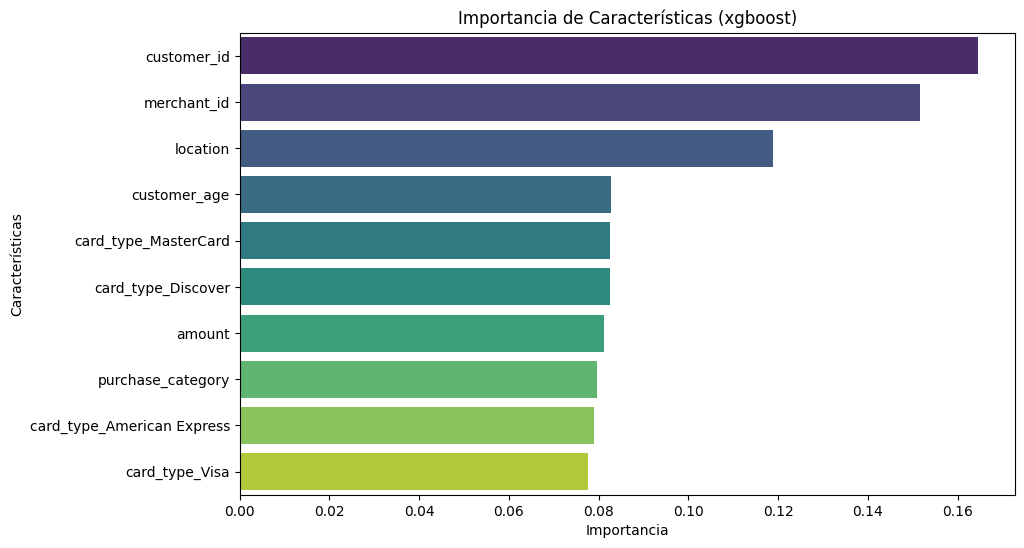

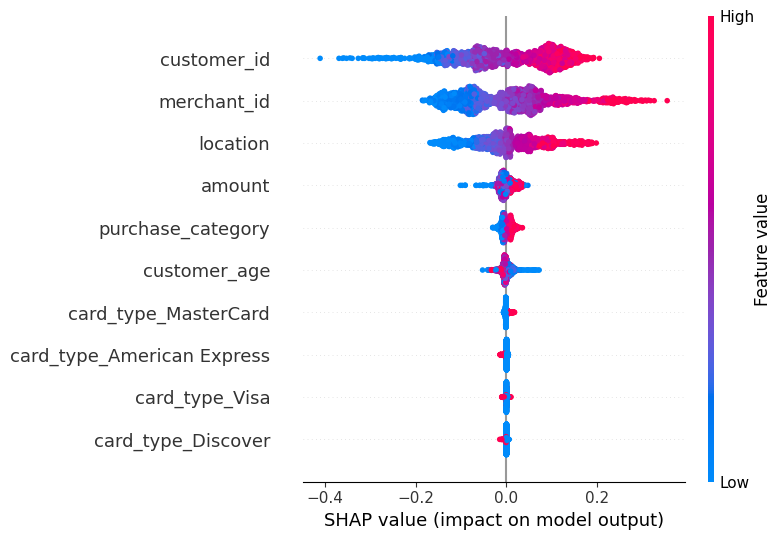

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.566125,0.571025,0.566125,0.556286,0.130048,0.595963,0.001034,11.0,NaN,NaN,decision tree
test,0.536000,0.534183,0.536000,0.525545,0.062501,0.556378,NaN,NaN,0.001034,11.0,decision tree
train,0.558375,0.558315,0.558375,0.558181,0.116429,0.585934,0.001982,NaN,NaN,NaN,regresion logistica
test,0.560000,0.559775,0.560000,0.559852,0.118501,0.596518,NaN,NaN,0.001982,NaN,regresion logistica
train,0.706125,0.706714,0.706125,0.705788,0.411909,0.795255,0.081281,NaN,NaN,NaN,random_forest
test,0.547000,0.546090,0.547000,0.545754,0.090599,0.574826,NaN,NaN,0.081281,NaN,random_forest
train,0.589875,0.590967,0.589875,0.587898,0.178781,0.631902,0.016545,11.0,NaN,NaN,gradient_boosting
test,0.554000,0.552957,0.554000,0.551734,0.103550,0.576997,NaN,NaN,0.016545,11.0,gradient_boosting
train,0.583750,0.584871,0.583750,0.581526,0.166466,0.625393,0.004490,NaN,NaN,NaN,xgboost
test,0.547000,0.545774,0.547000,0.544205,0.089044,0.577840,NaN,NaN,0.004490,NaN,xgboost


In [13]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

logistica.plot_matriz_confusion("xgboost")
logistica.importancia_predictores(modelo_nombre ='xgboost')
logistica.plot_shap_summary(modelo_nombre="xgboost")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = logistica.calcular_metricas(modelo_nombre =  "xgboost" )
df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)
df_resultados_final

In [21]:
def color_filas_por_modelo(row):
    # Define un diccionario con colores asociados a cada modelo
    modelo_colores = {
        'decision tree': 'background-color: lightblue; color: black',
        'regresion logistica': 'background-color: lightgreen; color: black',
        'random_forest': 'background-color: lightyellow; color: black',
        'gradient_boosting': 'background-color: lightcoral; color: black',
        'xgboost': 'background-color: lightpink; color: black'
    }
    
    # Obtén el modelo de la fila actual
    modelo = row['modelo']  # Cambia 'modelo' por el nombre de la columna que contiene los nombres de los modelos
    
    # Devuelve la lista de estilos
    if modelo in modelo_colores:
        return [modelo_colores[modelo]] * len(row)  # Aplica el estilo a toda la fila
    else:
        return ['color: black'] * len(row)  # Texto negro si no coincide con un modelo


In [22]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(color_filas_por_modelo, axis=1)
df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.566125,0.571025,0.566125,0.556286,0.130048,0.595963,0.001034,11.000000,nan,nan,decision tree
1,0.536000,0.534183,0.536000,0.525545,0.062501,0.556378,nan,nan,0.001034,11.000000,decision tree
2,0.558375,0.558315,0.558375,0.558181,0.116429,0.585934,0.001982,nan,nan,nan,regresion logistica
3,0.560000,0.559775,0.560000,0.559852,0.118501,0.596518,nan,nan,0.001982,nan,regresion logistica
4,0.706125,0.706714,0.706125,0.705788,0.411909,0.795255,0.081281,nan,nan,nan,random_forest
5,0.547000,0.546090,0.547000,0.545754,0.090599,0.574826,nan,nan,0.081281,nan,random_forest
6,0.589875,0.590967,0.589875,0.587898,0.178781,0.631902,0.016545,11.000000,nan,nan,gradient_boosting
7,0.554000,0.552957,0.554000,0.551734,0.103550,0.576997,nan,nan,0.016545,11.000000,gradient_boosting
8,0.583750,0.584871,0.583750,0.581526,0.166466,0.625393,0.004490,nan,nan,nan,xgboost
9,0.547000,0.545774,0.547000,0.544205,0.089044,0.577840,nan,nan,0.004490,nan,xgboost
